In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generic Functions

In [14]:
def get_full_df(npy_file):
    file = np.load(npy_file, allow_pickle=True)
    df = pd.DataFrame(file.T)
    df["iters"] = df.index + 1
    df = df[["iters"] + [col for col in df.columns if col != "iters"]]
    return df

def get_summary_df(full_df, metric="mse", n_reps=10, prop_iters=1.0):
    df = {}
    min_val_list = []
    min_val_iters_list = []
    final_val_list = []
    final_val_iters = []
    n_iters = int(prop_iters*len(full_df))
    for i in range(n_reps):
        val_list = full_df[i].to_list()
        val_list = val_list[:n_iters]
        min_val = np.min(val_list)
        min_val_iters = np.argmin(val_list)+1
        final_val = val_list[-1]
        min_val_list.append(min_val)
        min_val_iters_list.append(min_val_iters)
        final_val_list.append(final_val)
        final_val_iters.append(len(val_list))
    df = pd.DataFrame({f"min_{metric}": min_val_list, f"min_{metric}_iters": min_val_iters_list, 
                       f"final_{metric}": final_val_list, f"final_{metric}_iters": final_val_iters})
    return df

def get_lhs_plots(full_df, n_reps=10, prop_iters=0.1, subset=None, savefig=False):
    fig, ax = plt.subplots(figsize=(10,8))
    n_iters = int(prop_iters*len(full_df))
    if subset is None:
        seed_list = np.arange(0, n_reps)
    else:
        seed_list = subset
    for i in seed_list:
        lhs_vals = full_df[i].to_list()
        lhs_vals = lhs_vals[:n_iters]
        ax.plot(lhs_vals, label=f"seed {i}", alpha=0.7)
    ax.set_yscale("log")
    ax.set_xlabel("Iterations", fontsize=16)
    ax.set_ylabel("LHS", fontsize=16)
    ax.set_title(f"LHS during training (first {n_iters} iters)", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    if savefig:
        plt.savefig('lhs_plot.png', dpi=300)
    else:
        plt.show()

# 1. EXP

## 1.1 No noise

We obtain very good results across all seeds.

In [3]:
# Get the full validation MSE data frame
exp_full = get_full_df("rand_reps_exp.npy")
exp_full

,iters,0,1,2,3,4,5,6,7,8,9
0,1,4.746557e-01,4.746606e-01,4.746538e-01,4.746460e-01,4.746497e-01,4.746439e-01,4.746561e-01,4.746522e-01,4.746467e-01,4.746547e-01
1,2,4.400572e-01,4.400290e-01,4.400440e-01,4.401067e-01,4.401218e-01,4.401127e-01,4.400697e-01,4.401096e-01,4.401856e-01,4.400700e-01
2,3,3.427650e-01,3.426855e-01,3.428038e-01,3.429307e-01,3.429035e-01,3.429601e-01,3.427519e-01,3.428769e-01,3.430994e-01,3.428497e-01
3,4,1.779996e-01,1.779640e-01,1.780993e-01,1.782105e-01,1.781251e-01,1.782709e-01,1.780350e-01,1.781716e-01,1.783883e-01,1.782191e-01
4,5,2.074710e-02,2.066731e-02,2.079214e-02,2.081237e-02,2.075213e-02,2.084445e-02,2.072191e-02,2.081529e-02,2.084613e-02,2.085380e-02
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1.676114e-13,2.782214e-13,6.466612e-11,2.408794e-14,2.812768e-11,4.142476e-13,3.408198e-13,1.026583e-14,7.651774e-11,8.673304e-11
1996,1997,1.676114e-13,2.782214e-13,6.466612e-11,2.408794e-14,2.812768e-11,4.142476e-13,3.408198e-13,1.026583e-14,7.651774e-11,8.673304e-11
1997,1998,1.676114e-13,2.782214e-13,6.466612e-11,2.408794e-14,2.812768e-11,4.142476e-13,3.408198e-13,1.026583e-14,7.651774e-11,8.673304e-11
1998,1999,1.676114e-13,4.382175e-13,6.466612e-11,2.408794e-14,2.812768e-11,4.142476e-13,3.408198e-13,1.026583e-14,7.651774e-11,8.673304e-11


In [4]:
# Get a summary of the MSE across seeds
exp_summary = get_summary_df(exp_full)
exp_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.004337e-13,649,1.676114e-13,2000
1,2.727069e-13,648,4.382175e-13,2000
2,5.830798e-11,731,6.466612e-11,2000
3,2.408794e-14,1063,2.408794e-14,2000
4,2.308548e-11,859,2.812768e-11,2000
5,2.334651e-13,736,4.142476e-13,2000
6,2.776882e-13,738,3.408198e-13,2000
7,1.026583e-14,949,1.026583e-14,2000
8,7.093053e-11,884,7.651774e-11,2000
9,7.687641e-11,705,8.673304e-11,2000


## 1.2 Noise after tuning

Noise improves the results, lowering the mean validation MSE by an order of magnitude.

In [5]:
# Get a summary of the MSE across seeds
exp_full = get_full_df("rand_reps_exp_noise_1.npy")
exp_summary = get_summary_df(exp_full)
exp_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,2.586559e-13,833,3.727642e-13,2000
1,3.867184e-14,743,5.821585e-13,2000
2,7.701270e-12,746,9.191179e-12,2000
3,3.676960e-12,825,5.102898e-12,2000
4,4.728251e-13,909,5.293022e-13,2000
5,5.802772e-13,898,6.475366e-13,2000
6,1.655414e-14,542,5.807018e-13,2000
7,3.664431e-13,926,3.695142e-13,2000
8,5.022975e-14,738,4.158357e-13,2000
9,5.734974e-13,704,6.832889e-13,2000


## 1.3 Adam (no noise)

In [6]:
# Get a summary of the MSE across seeds
exp_full = get_full_df("rand_reps_exp_adam.npy")
exp_summary = get_summary_df(exp_full, n_reps=20)
exp_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.182350e-16,760,1.291466e-14,1000
1,3.182350e-16,758,3.182350e-16,1000
2,3.182350e-16,583,3.182350e-16,1000
3,3.182350e-16,754,1.291466e-14,1000
4,3.182350e-16,843,3.182350e-16,1000
5,3.182350e-16,737,1.294608e-14,1000
6,3.182350e-16,804,3.182350e-16,1000
7,3.182350e-16,719,3.182350e-16,1000
8,3.182350e-16,790,3.182350e-16,1000
9,3.182350e-16,813,3.182350e-16,1000


## 1.4 Adam (noise after tuning)

In [7]:
# Get a summary of the MSE across seeds
exp_full = get_full_df("rand_reps_exp_adam_noise.npy")
exp_summary = get_summary_df(exp_full, n_reps=20)
exp_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.182350e-16,760,4.948368e-14,1000
1,3.182350e-16,800,3.182350e-16,1000
2,3.182350e-16,827,3.182350e-16,1000
3,3.182350e-16,781,1.294608e-14,1000
4,3.182350e-16,711,1.294608e-14,1000
5,3.182350e-16,795,1.294608e-14,1000
6,3.182350e-16,805,1.291466e-14,1000
7,3.182350e-16,736,3.182350e-16,1000
8,3.182350e-16,802,3.182350e-16,1000
9,3.182350e-16,827,3.182350e-16,1000


# 2. SHO

## 2.1 No noise

We obtain generally very good results but observe two seeds that never improve during training.

In [3]:
# Get a summary of the MSE across seeds
sho_full = get_full_df("rand_reps_sho.npy")
sho_summary = get_summary_df(sho_full)
sho_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,8.249775e-11,4029,4.255164e-10,10000
1,4.853613e-11,2880,5.102058e-10,10000
2,5.275599e-11,8734,2.705398e-10,10000
3,2.544008e-11,8978,2.752317e-10,10000
4,3.127805e-12,6542,1.093761e-10,10000
5,3.773394e-11,5244,5.315696e-10,10000
6,3.846670e-02,1018,4.819122e-01,10000
7,1.222590e-11,5243,1.070111e-10,10000
8,1.605145e-03,9918,1.608532e-03,10000
9,5.634251e-12,8863,5.726357e-12,10000


## 2.2 Noise after tuning

Noise improves stability of results, fixing the two seeds that performed poorly.

In [9]:
# Get a summary of the MSE across seeds
sho_full = get_full_df("rand_reps_sho_noise_1.npy")
sho_summary = get_summary_df(sho_full)
sho_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,4.845770e-11,3645,3.738518e-10,10000
1,1.262656e-11,5537,3.613082e-11,10000
2,1.265906e-10,4614,1.649324e-10,10000
3,1.639964e-11,2948,1.634220e-10,10000
4,3.147885e-11,3560,3.168681e-10,10000
5,3.890491e-11,2498,1.417493e-10,10000
6,1.745135e-11,4819,3.134744e-11,10000
7,5.686159e-11,2408,2.173837e-10,10000
8,5.640133e-11,5849,5.685734e-11,10000
9,1.125001e-11,5821,2.973742e-11,10000


## 2.3 Adam (no noise)

In [10]:
# Get a summary of the MSE across seeds
sho_full = get_full_df("rand_reps_sho_adam.npy")
sho_summary = get_summary_df(sho_full, n_reps=20)
sho_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,6.949882e-13,9640,2.646104e-12,10000
1,1.059259e-12,9841,9.952952e-12,10000
2,2.800808e-12,9212,5.772310e-11,10000
3,1.161548e-12,9237,4.432507e-12,10000
4,8.455382e-13,9955,1.800132e-12,10000
5,1.034651e-12,9301,2.239698e-12,10000
6,1.020633e-12,8834,3.868005e-11,10000
7,1.568049e-12,9681,8.094686e-12,10000
8,6.695560e-13,9917,1.932253e-12,10000
9,6.603821e-13,9552,1.280856e-12,10000


## 2.4 Adam (noise after tuning)

In [11]:
# Get a summary of the MSE across seeds
sho_full = get_full_df("rand_reps_sho_adam_noise.npy")
sho_summary = get_summary_df(sho_full, n_reps=20)
sho_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,9.539417e-13,9959,5.610926e-12,10000
1,1.102549e-12,9982,5.762891e-12,10000
2,3.191839e-13,9682,1.907260e-12,10000
3,7.990339e-13,9835,1.126042e-11,10000
4,1.721623e-12,8985,1.032390e-11,10000
5,2.793750e-12,9887,2.985531e-11,10000
6,8.449570e-13,9633,2.089088e-12,10000
7,4.482795e-13,9665,1.122717e-11,10000
8,8.377300e-13,9239,1.172766e-11,10000
9,1.158776e-12,9915,4.474249e-12,10000


# 3. NLO

## 3.1 No noise

In [12]:
# Get a summary of the MSE across seeds
nlo_full = get_full_df("rand_reps_nlo.npy")
nlo_summary = get_summary_df(nlo_full)
nlo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,2.012188e-08,19565,2.487858e-08,20000
1,2.059821e-08,19760,2.794884e-08,20000
2,1.857950e-08,19560,3.264189e-08,20000
3,2.106556e-08,19685,3.357819e-08,20000
4,1.908642e-08,19928,2.902942e-08,20000
5,1.946937e-08,19783,2.553012e-08,20000
6,1.920052e-08,18827,3.193488e-08,20000
7,1.893410e-08,18812,3.297774e-08,20000
8,2.076334e-08,19205,2.788512e-08,20000
9,2.094348e-08,18953,2.380631e-08,20000


## 3.2 Noise after tuning

In [13]:
# Get a summary of the MSE across seeds
nlo_full = get_full_df("rand_reps_nlo_noise_1.npy")
nlo_summary = get_summary_df(nlo_full)
nlo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.067020e-08,19997,4.039383e-08,20000
1,2.506759e-08,19626,4.160630e-08,20000
2,2.539452e-08,19822,4.003948e-08,20000
3,1.669530e-08,19181,2.651417e-08,20000
4,2.025340e-08,19921,2.223470e-08,20000
5,1.822054e-08,19657,2.705967e-08,20000
6,2.251306e-08,19973,3.488466e-08,20000
7,1.463856e-08,19331,2.431310e-08,20000
8,2.677572e-08,19958,3.263035e-08,20000
9,2.839763e-08,19720,4.181555e-08,20000


## 3.3 Adam (no noise)

In [14]:
# Get a summary of the MSE across seeds
nlo_full = get_full_df("rand_reps_nlo_adam.npy")
nlo_summary = get_summary_df(nlo_full, n_reps=20)
nlo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.032193e-12,8939,3.971227e-12,20000
1,6.134351e-12,7956,1.392060e-11,20000
2,2.730815e-12,8652,8.541823e-12,20000
3,1.463018e-12,9031,2.173762e-12,20000
4,8.591035e-13,9883,1.983389e-12,20000
5,2.966206e-12,8043,1.304809e-11,20000
6,3.185039e-02,78,1.051502e+00,20000
7,1.897671e-12,9506,2.779650e-12,20000
8,1.559392e-12,10389,1.851765e-12,20000
9,6.431882e-10,8652,7.880649e-10,20000


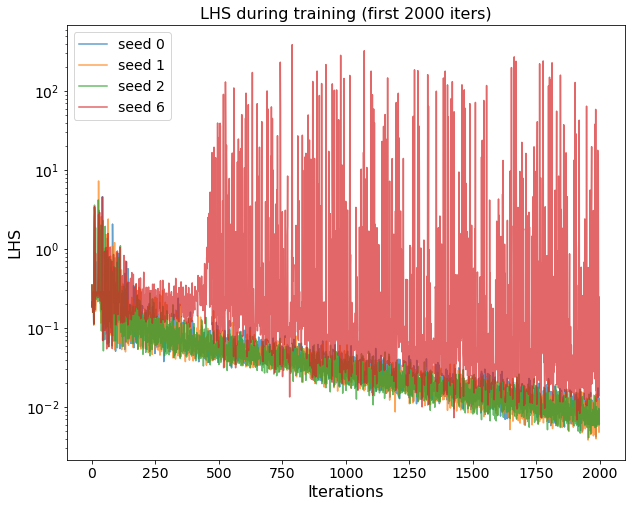

In [15]:
# Plot the LHS during training
nlo_lhs = get_full_df("rand_reps_nlo_lhs.npy")
get_lhs_plots(nlo_lhs, n_reps=20, prop_iters=0.2, subset=[0,1,2,6], savefig=True)

## 3.4 Adam (noise after tuning)

In [16]:
# Get a summary of the MSE across seeds
nlo_full = get_full_df("rand_reps_nlo_adam_noise.npy")
nlo_summary = get_summary_df(nlo_full, n_reps=20)
nlo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.374536e-12,9531,1.944244e-12,20000
1,3.891232e-12,9292,5.529722e-12,20000
2,4.820108e-12,8506,1.052817e-11,20000
3,3.752197e-12,8699,6.965036e-12,20000
4,8.735825e-12,7488,1.502813e-11,20000
5,2.563437e-12,9606,4.076467e-12,20000
6,2.301169e-11,8412,6.294290e-11,20000
7,9.646977e-12,7923,1.283425e-11,20000
8,4.922947e-12,8420,1.131490e-11,20000
9,3.548549e-02,41,1.050310e+00,20000


# 4. POS

## 4.1 No noise

We obtain very good and consistent results across all seeds.

In [17]:
# Get a summary of the MSE across seeds
pos_full = get_full_df("rand_reps_pos.npy")
pos_summary = get_summary_df(pos_full)
pos_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,7.625418e-12,3984,8.491730e-12,4000
1,5.861788e-12,3969,5.963139e-12,4000
2,8.617010e-12,3981,9.597004e-12,4000
3,1.076432e-11,3937,1.103256e-11,4000
4,1.346913e-11,3976,1.600508e-11,4000
5,1.079694e-11,3950,1.255131e-11,4000
6,2.888076e-12,3981,3.012331e-12,4000
7,5.713636e-12,3874,5.973069e-12,4000
8,1.248126e-11,3997,1.312948e-11,4000
9,4.187312e-11,3983,4.507396e-11,4000


## 4.2 Noise after tuning

In this case, adding noise lowered solution accuracy, although the results are stable.

In [18]:
# Get a summary of the MSE across seeds
pos_full = get_full_df("rand_reps_pos_noise_1.npy")
pos_summary = get_summary_df(pos_full)
pos_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.203856e-09,3989,1.215394e-09,4000
1,4.947863e-10,3559,5.005950e-10,4000
2,1.806374e-10,3803,1.912235e-10,4000
3,1.363557e-10,3929,1.440514e-10,4000
4,4.396103e-10,3970,4.471216e-10,4000
5,8.872748e-10,3849,9.099729e-10,4000
6,6.134688e-10,3986,6.166037e-10,4000
7,1.333717e-10,3997,1.341590e-10,4000
8,9.692190e-10,3989,9.913105e-10,4000
9,1.117513e-09,3924,1.127788e-09,4000


## 4.3 Adam (no noise)

In [19]:
# Get a summary of the MSE across seeds
pos_full = get_full_df("rand_reps_pos_adam.npy")
pos_summary = get_summary_df(pos_full, n_reps=20)
pos_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.050902e-12,2568,1.436877e-12,4000
1,1.707731e-12,2425,2.146807e-12,4000
2,7.787284e-13,2475,1.124654e-12,4000
3,1.082065e-12,2309,1.140577e-12,4000
4,9.097692e-13,2395,1.005552e-12,4000
5,5.054767e-13,2373,5.399321e-13,4000
6,1.063744e-12,2232,2.098965e-12,4000
7,8.850637e-13,2531,1.581557e-12,4000
8,8.161408e-13,2292,8.734907e-13,4000
9,1.625556e-12,2420,2.124601e-12,4000


## 4.4 Adam (noise after tuning)

In [20]:
# Get a summary of the MSE across seeds
pos_full = get_full_df("rand_reps_pos_adam_noise.npy")
pos_summary = get_summary_df(pos_full, n_reps=20)
pos_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,7.243365e-13,2428,7.368961e-13,4000
1,9.406646e-13,2429,1.018812e-12,4000
2,3.482194e-12,2627,3.516865e-12,4000
3,8.932084e-13,2729,9.842007e-13,4000
4,1.024856e-12,2149,3.209966e-12,4000
5,1.155631e-12,2511,1.444044e-12,4000
6,6.549532e-13,2323,6.722455e-13,4000
7,4.322165e-13,2472,4.972379e-13,4000
8,6.443785e-13,2437,1.155068e-12,4000
9,1.164365e-12,2327,2.764802e-12,4000


# 5. SIR

## 5.1 No noise (Adam optimizer)

In [21]:
# Get a summary of the MSE across seeds
sir_full = get_full_df("rand_reps_sir_adam.npy")
sir_summary = get_summary_df(sir_full, n_reps=20)
sir_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.165608e-09,26379,1.333045e-09,30000
1,1.662751e-03,3975,3.875408e-01,30000
2,2.692391e-03,29183,2.790096e-03,30000
3,1.980816e-09,29898,2.046600e-09,30000
4,2.755768e-08,26778,3.059807e-08,30000
5,1.993265e-07,15263,2.452545e-07,30000
6,6.597986e-07,22483,9.111996e-07,30000
7,1.541048e-08,20241,5.142203e-08,30000
8,1.707286e-08,29994,1.725338e-08,30000
9,2.210747e-09,27238,2.774004e-09,30000


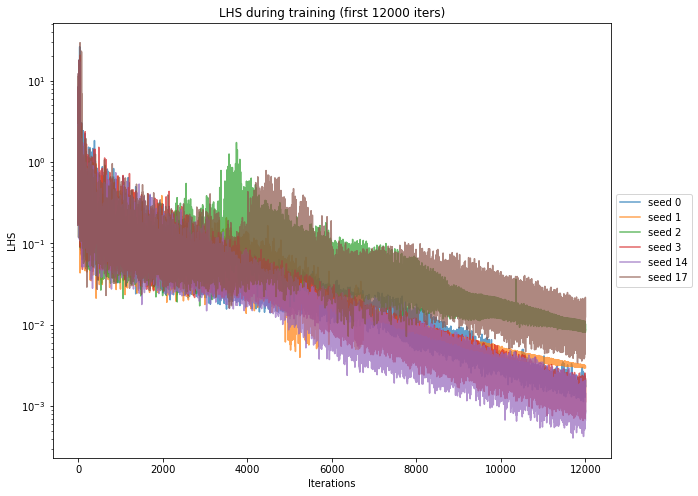

In [29]:
# Plot the LHS during training
sir_lhs = get_full_df("rand_reps_sir_lhs.npy")
get_lhs_plots(sir_lhs, n_reps=20, prop_iters=0.4, subset=[0,1,2,3,14,17])

## 5.2 Noise after tuning (Adam optimizer)

In [30]:
# Get a summary of the MSE across seeds
sir_full = get_full_df("rand_reps_sir_adam_noise.npy")
sir_summary = get_summary_df(sir_full, n_reps=20)
sir_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.458922e-07,26345,4.847688e-07,30000
1,2.953224e-08,29977,3.050655e-08,30000
2,5.172009e-09,29989,5.268113e-09,30000
3,1.055127e-07,29993,1.070018e-07,30000
4,9.305415e-09,29943,9.537780e-09,30000
5,1.542368e-08,29991,1.571501e-08,30000
6,5.377069e-07,29943,5.426709e-07,30000
7,7.139307e-04,30000,7.139307e-04,30000
8,8.494647e-09,29098,9.117068e-09,30000
9,4.053935e-08,29371,4.183498e-08,30000


We want to bridge the gap between Adam and SGD so that we can obtain good results using SGD. In PyTorch, the weight update for SGD with Nesterov's momentum is

$$
w_{t+1} = w_t - \eta*v_{t+1} \\
v_{t+1} = p*v_t + g_{t+1}
$$

where $p$ is the momentum. For Adam, the update is

$$
w_{t+1} = w_t - \frac{\eta}{\sqrt{v_t} + \epsilon}m_t \\
m_{t+1} = \frac{\beta_1 m_t + (1-\beta_1)g_t}{1-\beta^t_1} \\
v_{t+1} = \frac{\beta_2 v_t + (1-\beta_2)g^2_t}{1-\beta^t_2}
$$

For both Adam and SGD, we apply a `StepLR` scheduler that we use to decay $\eta$ by a factor of $\gamma$ every `step_size` iterations, i.e. $\eta_{t+1} = \gamma \eta_t.$

Pavlos suggestions:
- We want the effective learning rate of the two optimizers to look the same!
- Plot the effective learning rate vs iterations for SGD - the bad ones should go down really fast (see picture)
- Sanity check: record the effective learning rate of Adam at fixed iterations and run SGD, setting the effective learning rate of SGD to that of Adam (hack)
- Play around with the equations more - we want to find out how to use the parameters of SGD to mimic the parameters of Adam *exactly*.

# 6. COO

## 6.1 No noise (Adam optimizer)

In [31]:
# Get a summary of the MSE across seeds
coo_full = get_full_df("rand_reps_coo_adam.npy")
coo_summary = get_summary_df(coo_full, n_reps=20)
coo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,2.927478e-01,1523,3.916578e-01,50000
1,1.602252e-07,49983,1.815365e-07,50000
2,1.660811e-08,49948,3.127795e-08,50000
3,5.003755e-02,49938,5.007989e-02,50000
4,3.418450e-01,1238,4.573132e-01,50000
5,2.833313e-07,49963,3.346912e-07,50000
6,7.983864e-02,45714,8.131634e-02,50000
7,3.961707e-09,48694,7.051041e-09,50000
8,3.255852e-01,1779,4.935453e-01,50000
9,2.318513e-01,49409,2.319426e-01,50000


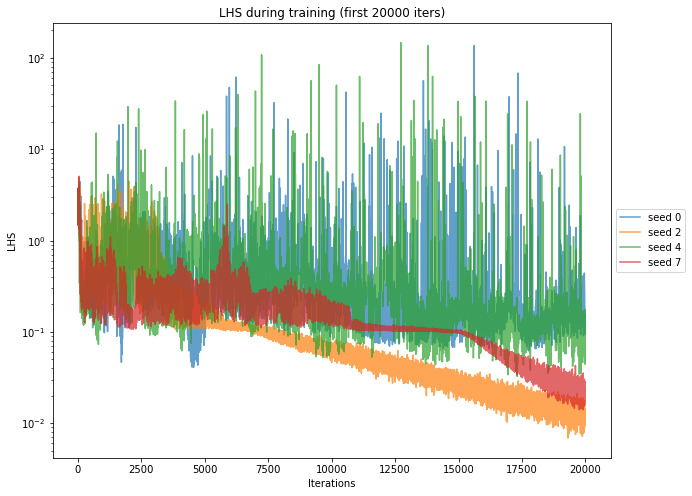

In [35]:
# Plot the LHS during training
coo_lhs = get_full_df("rand_reps_coo_lhs.npy")
get_lhs_plots(coo_lhs, n_reps=20, prop_iters=0.4, subset=[0,2,4,7])

## 6.1 Noise after tuning (Adam optimizer)

In [7]:
# Get a summary of the MSE across seeds
coo_full = get_full_df("rand_reps_coo_adam_noise.npy")
coo_summary = get_summary_df(coo_full, n_reps=20)
coo_summary

,min_val_mse,min_mse_iters,final_val_mse,final_mse_iters
0,1.508516e-08,49528,2.169325e-08,50000
1,2.692936e-01,3933,4.776902e-01,50000
2,1.382492e-07,49909,1.475110e-07,50000
3,5.481335e-06,49991,5.839960e-06,50000
4,1.266217e-08,48783,2.005465e-08,50000
5,1.673739e-01,35795,1.745717e-01,50000
6,2.551528e-01,4923,4.092710e-01,50000
7,5.804309e-08,49759,6.943006e-08,50000
8,3.882232e-07,49999,3.998213e-07,50000
9,2.829957e-01,39840,2.836671e-01,50000


# 7. Wave equation

## 7.1 No noise (Adam optimizer)

In [3]:
# Get a summary of the MSE across seeds
wav_full = get_full_df("rand_reps_wav_adam.npy")
wav_summary = get_summary_df(wav_full, n_reps=20)
wav_summary

,min_val_mse,min_mse_iters,final_val_mse,final_mse_iters
0,3.718295e-08,4485,4.320515e-08,8000
1,1.444768e-08,3862,2.341829e-08,8000
2,9.059934e-09,3954,1.844072e-08,8000
3,2.473205e-08,4558,3.042609e-08,8000
4,1.413310e-08,4706,2.204365e-08,8000
5,1.087896e-08,4067,1.806897e-08,8000
6,2.610031e-08,4230,3.270642e-08,8000
7,8.049375e-09,3959,1.513179e-08,8000
8,1.017334e-08,4999,1.288625e-08,8000
9,1.797156e-09,4699,2.319698e-09,8000


## 7.2 Noise after tuning (Adam optimizer)

In [4]:
# Get a summary of the MSE across seeds
wav_full = get_full_df("rand_reps_wav_adam_noise.npy")
wav_summary = get_summary_df(wav_full, n_reps=20)
wav_summary

,min_val_mse,min_mse_iters,final_val_mse,final_mse_iters
0,8.820504e-08,2992,1.374122e-07,5000
1,7.647206e-09,3446,1.173854e-08,5000
2,5.434381e-08,4337,7.118270e-08,5000
3,3.402164e-08,4369,4.182587e-08,5000
4,4.153043e-09,4560,7.986273e-09,5000
5,7.195533e-09,4400,8.481139e-09,5000
6,1.890921e-08,3783,3.017631e-08,5000
7,3.796485e-08,4395,4.598402e-08,5000
8,1.142823e-08,4195,1.409692e-08,5000
9,1.834281e-09,3293,6.180348e-09,5000


# 8. Inviscid Burgers' equation

## 8.1 No noise (Adam optimizer)

In [37]:
# Get a summary of the MSE across seeds
bur_full = get_full_df("rand_reps_bur_adam.npy")
bur_summary = get_summary_df(bur_full, n_reps=20)
bur_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.486560e-07,1280,1.453167e-06,30000
1,3.673123e-06,633,1.172405e-05,30000
2,5.540971e-07,819,7.462309e-06,30000
3,1.028206e-06,533,7.331835e-06,30000
4,2.747658e-06,816,4.596980e-06,30000
5,3.468154e-07,1049,8.499425e-07,30000
6,1.455713e-06,754,9.458409e-06,30000
7,1.292371e-07,1071,3.823737e-07,30000
8,4.461641e-07,935,1.031530e-06,30000
9,3.798776e-06,599,2.249407e-05,30000


## 8.2 Noise after tuning (Adam optimizer)

In [39]:
# Get a summary of the MSE across seeds
bur_full = get_full_df("rand_reps_bur_adam_noise.npy")
bur_summary = get_summary_df(bur_full, n_reps=20)
bur_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,2.242243e-06,1026,3.439093e-06,3000
1,4.278535e-08,1659,6.312779e-08,3000
2,2.641765e-07,2989,2.665267e-07,3000
3,3.902083e-07,636,1.351820e-06,3000
4,5.156950e-08,1629,3.300022e-07,3000
5,2.126190e-07,1382,2.233729e-07,3000
6,2.558382e-07,796,3.199414e-06,3000
7,3.297373e-07,941,3.195696e-06,3000
8,3.079275e-07,1042,1.576305e-06,3000
9,8.733887e-08,1236,1.691670e-06,3000


# 9. Burgers' viscous equation

## 9.1 No noise (Adam optimizer)

In [4]:
# Get a summary of the MSE across seeds
burv_full = get_full_df("rand_reps_burv_adam.npy")
burv_summary = get_summary_df(burv_full, n_reps=20)
burv_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,0.000003,2829,0.000003,3000
1,0.000111,1785,0.000117,3000
2,0.000006,2977,0.000007,3000
3,0.000005,2679,0.000005,3000
4,0.000003,2786,0.000003,3000
5,0.000003,2962,0.000003,3000
6,0.000005,2796,0.000007,3000
7,0.000004,2840,0.000008,3000
8,0.000003,2664,0.000003,3000
9,0.000004,2987,0.000005,3000


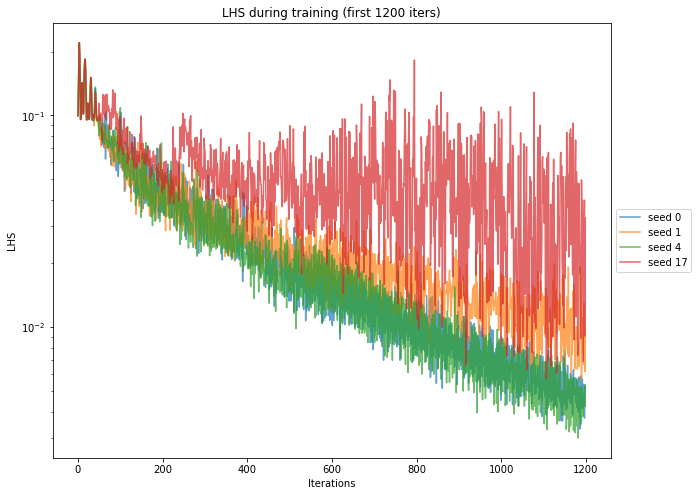

In [5]:
# Plot the LHS during training
burv_lhs = get_full_df("rand_reps_burv_lhs.npy")
get_lhs_plots(burv_lhs, n_reps=20, prop_iters=0.4, subset=[0,1,4,17])

# 10. ACA (Allen-Cahn)

## 10.1 No noise (Adam optimizer) 

In [3]:
# Get a summary of the MSE across seeds
aca_full = get_full_df("rand_reps_aca_adam.npy")
aca_summary = get_summary_df(aca_full, n_reps=20)
aca_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,0.235425,2012,0.387584,10000
1,0.029949,9934,0.030000,10000
2,0.218330,2237,0.260793,10000
3,0.032865,9973,0.032941,10000
4,0.310907,1852,0.360900,10000
5,0.306078,1511,0.339563,10000
6,0.029835,9903,0.029848,10000
7,0.032698,9992,0.032724,10000
8,0.118094,9766,0.118236,10000
9,0.292164,1353,0.312915,10000


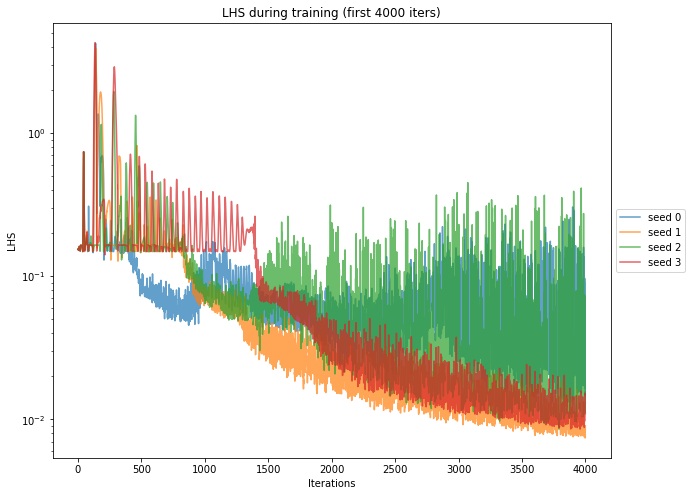

In [4]:
# Plot the LHS during training
aca_lhs = get_full_df("rand_reps_aca_lhs.npy")
get_lhs_plots(aca_lhs, n_reps=20, prop_iters=0.4, subset=[0,1,2,3])

Next steps:
- statistics for early abandonment of various experiments
- new approach of learning a *general* generator? learning hyperparameters for a general class of functions (would be interesting to observe optimal lr increasing with lambda, where lambda is parameter that defines different diffeq's in the general class)